In [1]:
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0138-3
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
#https://oig.hhs.gov/exclusions/exclusions_list.asp - LEIE Dataset
#https://data.cms.gov/resources/medicare-part-d-prescribers-by-provider-and-drug-data-dictionary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part D data can be considered to provide procedure-level information.
my_list = []
for chunk in  pd.read_csv(r'D:\Data _Science\IndependentResearch\provider_charge_data\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31.csv', chunksize=20000,encoding='latin-1',low_memory=False, error_bad_lines = False):
    my_list.append(chunk)


In [4]:
df= pd.concat(my_list, axis= 0)

In [5]:
df.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,360,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,780,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,1482,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,77,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,787,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25401870 entries, 0 to 25401869
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Prscrbr_NPI            int64  
 1   Prscrbr_Last_Org_Name  object 
 2   Prscrbr_First_Name     object 
 3   Prscrbr_City           object 
 4   Prscrbr_State_Abrvtn   object 
 5   Prscrbr_State_FIPS     object 
 6   Prscrbr_Type           object 
 7   Prscrbr_Type_Src       object 
 8   Brnd_Name              object 
 9   Gnrc_Name              object 
 10  Tot_Clms               int64  
 11  Tot_30day_Fills        float64
 12  Tot_Day_Suply          int64  
 13  Tot_Drug_Cst           float64
 14  Tot_Benes              float64
 15  GE65_Sprsn_Flag        object 
 16  GE65_Tot_Clms          float64
 17  GE65_Tot_30day_Fills   float64
 18  GE65_Tot_Drug_Cst      float64
 19  GE65_Tot_Day_Suply     float64
 20  GE65_Bene_Sprsn_Flag   object 
 21  GE65_Tot_Benes         float64
dtypes: float64(8), i

In [7]:
df.describe()

,Prscrbr_NPI,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes
count,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,1.070614e+07,1.402100e+07,1.402100e+07,1.402100e+07,1.402100e+07,2.589094e+06
mean,1.499506e+09,5.097666e+01,8.669875e+01,2.433167e+03,5.394291e+03,3.012260e+01,4.962052e+01,8.759334e+01,4.886409e+03,2.487666e+03,3.333644e+01
std,2.877596e+08,1.272163e+02,1.845877e+02,4.700585e+03,3.749361e+04,1.039127e+02,1.488382e+02,2.084941e+02,3.666938e+04,5.024198e+03,1.961413e+02
min,1.003000e+09,1.100000e+01,1.100000e+01,1.000000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245673e+09,1.500000e+01,2.100000e+01,4.800000e+02,2.621900e+02,1.400000e+01,1.300000e+01,1.800000e+01,2.248300e+02,4.250000e+02,1.300000e+01
50%,1.497925e+09,2.400000e+01,3.800000e+01,1.020000e+03,6.713800e+02,2.000000e+01,2.200000e+01,3.600000e+01,6.200600e+02,9.900000e+02,1.900000e+01
75%,1.740720e+09,5.000000e+01,8.200000e+01,2.310000e+03,2.161750e+03,3.300000e+01,4.700000e+01,8.000000e+01,2.035420e+03,2.250000e+03,3.400000e+01
max,1.993000e+09,1.993870e+05,2.047677e+05,6.066460e+05,3.343712e+07,1.418610e+05,1.906370e+05,1.957407e+05,3.196401e+07,5.928350e+05,1.355460e+05


##  Inspecting the null % 

In [8]:
colnames=(df.isnull().sum()*100/len(df)) 
colnames

Prscrbr_NPI               0.000000
Prscrbr_Last_Org_Name     0.000000
Prscrbr_First_Name        0.000000
Prscrbr_City              0.000000
Prscrbr_State_Abrvtn      0.000000
Prscrbr_State_FIPS        0.000000
Prscrbr_Type              0.000008
Prscrbr_Type_Src          0.000000
Brnd_Name                 0.000000
Gnrc_Name                 0.000000
Tot_Clms                  0.000000
Tot_30day_Fills           0.000000
Tot_Day_Suply             0.000000
Tot_Drug_Cst              0.000000
Tot_Benes                57.852938
GE65_Sprsn_Flag          55.196728
GE65_Tot_Clms            44.803272
GE65_Tot_30day_Fills     44.803272
GE65_Tot_Drug_Cst        44.803272
GE65_Tot_Day_Suply       44.803272
GE65_Bene_Sprsn_Flag     10.192533
GE65_Tot_Benes           89.807467
dtype: float64

### Inference 
- Tot_Benes                57.852938
- GE65_Sprsn_Flag          55.196728
- GE65_Tot_Clms            44.803272
- GE65_Tot_30day_Fills     44.803272
- GE65_Tot_Drug_Cst        44.803272
- GE65_Tot_Day_Suply       44.803272
- GE65_Bene_Sprsn_Flag     10.192533
- GE65_Tot_Benes           89.807467

GE65_Tot_Benes seems to have a lot of nulls this column might not be of use . 



In [9]:
cat_vals = df.select_dtypes(include=['object']).columns
cat_vals=cat_vals.to_list()
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

## GETTING THE UPDATED LEIE DATA

In [10]:
df_leie = pd.read_csv(r'D:\Data _Science\IndependentResearch\provider_charge_data\UPDATED_LEIE.csv')
df_leie.head(5)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN


### We will consider those where NPI is not 0 and will consider only 2 columns  NPI and EXCLTYPE

In [11]:
df_leie_rq = df_leie.loc[:,['NPI','EXCLTYPE']]
df_leie_rq.head()

,NPI,EXCLTYPE
0,0,1128a1
1,0,1128a1
2,0,1128b7
3,1922348218,1128a1
4,0,1128b5


In [12]:
df_leie_rq = df_leie_rq.query('NPI !=0')
df_leie_rq.head()

,NPI,EXCLTYPE
3,1922348218,1128a1
23,1942476080,1128b8
27,1275600959,1128a1
30,1891731758,1128b8
58,1851631543,1128b7


In [13]:
rename_dict = {'NPI':'Prscrbr_NPI', 'EXCLTYPE':'is_fraud'} 
df_leie_rq = df_leie_rq.rename(columns=rename_dict)

In [14]:
df_leie_rq['is_fraud'] = 1 #These NPI are included in exclusion list , lets consider this as fraudulent records for now.
df_leie_rq.head()

,Prscrbr_NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1


### Merge the NPI data and the Prscrbr Data 

In [15]:
df_complete= pd.merge(df, df_leie_rq, on='Prscrbr_NPI' , how = 'left')

In [16]:
import gc

del [[df]]
gc.collect()

93

In [17]:
df_complete.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0,NaN
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0,NaN
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0,NaN


In [18]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25401870 entries, 0 to 25401869
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Prscrbr_NPI            int64  
 1   Prscrbr_Last_Org_Name  object 
 2   Prscrbr_First_Name     object 
 3   Prscrbr_City           object 
 4   Prscrbr_State_Abrvtn   object 
 5   Prscrbr_State_FIPS     object 
 6   Prscrbr_Type           object 
 7   Prscrbr_Type_Src       object 
 8   Brnd_Name              object 
 9   Gnrc_Name              object 
 10  Tot_Clms               int64  
 11  Tot_30day_Fills        float64
 12  Tot_Day_Suply          int64  
 13  Tot_Drug_Cst           float64
 14  Tot_Benes              float64
 15  GE65_Sprsn_Flag        object 
 16  GE65_Tot_Clms          float64
 17  GE65_Tot_30day_Fills   float64
 18  GE65_Tot_Drug_Cst      float64
 19  GE65_Tot_Day_Suply     float64
 20  GE65_Bene_Sprsn_Flag   object 
 21  GE65_Tot_Benes         float64
 22  is_fraud        

Total number of rows in the dataset is 25,401,869. which is impossible to process with local resources as it almost consumes 4.2 gb of data.
So taking a saple from the dataset.100,000 records

## 1. Data Pre processing and EDA

In [19]:
df_subset= df_complete.sample(n=100000) ## it performs a random sampling 

In [20]:
colnames=(df_subset.isnull().sum()*100/len(df_subset)) 
colnames

Prscrbr_NPI               0.000
Prscrbr_Last_Org_Name     0.000
Prscrbr_First_Name        0.000
Prscrbr_City              0.000
Prscrbr_State_Abrvtn      0.000
Prscrbr_State_FIPS        0.000
Prscrbr_Type              0.000
Prscrbr_Type_Src          0.000
Brnd_Name                 0.000
Gnrc_Name                 0.000
Tot_Clms                  0.000
Tot_30day_Fills           0.000
Tot_Day_Suply             0.000
Tot_Drug_Cst              0.000
Tot_Benes                57.727
GE65_Sprsn_Flag          55.060
GE65_Tot_Clms            44.940
GE65_Tot_30day_Fills     44.940
GE65_Tot_Drug_Cst        44.940
GE65_Tot_Day_Suply       44.940
GE65_Bene_Sprsn_Flag     10.155
GE65_Tot_Benes           89.845
is_fraud                 99.977
dtype: float64

The sample dataset almost has the similar number of the null values, we can use that for our inference building and
can run the entire dataset once the cloud environment is available 

In [21]:
## deleting the bigger dataframe now as it is causing system crash 

del [[df_complete]]

gc.collect()

100

## 1.1 Value Counts to see how the Data is spread into categories 

In [22]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
for val in cat_vals:
    df_subset[val].value_counts(dropna=False)
    

Patel           568
Smith           526
Johnson         379
Lee             372
Williams        318
               ... 
Murray Ortiz      1
Stendel           1
Carracino         1
Cayere            1
Yudell            1
Name: Prscrbr_Last_Org_Name, Length: 40608, dtype: int64

Michael        1899
John           1882
David          1841
Robert         1457
James          1389
               ... 
Chentel           1
Sheeta            1
Damascene         1
Sajidmahmad       1
Lorance           1
Name: Prscrbr_First_Name, Length: 14422, dtype: int64

New York           916
Houston            735
Brooklyn           731
Chicago            659
Los Angeles        639
                  ... 
Slickville           1
Plantation,          1
West Portsmouth      1
Waveland             1
Mammoth Spring       1
Name: Prscrbr_City, Length: 6984, dtype: int64

CA    9685
NY    6787
FL    6748
TX    6372
PA    4943
OH    4025
NC    3603
MI    3541
IL    3505
GA    2885
NJ    2650
TN    2495
MA    2344
IN    2250
MO    2236
VA    2230
WI    1904
WA    1884
AZ    1839
KY    1836
MN    1728
LA    1643
SC    1632
AL    1631
MD    1466
PR    1392
CO    1356
OR    1295
CT    1249
OK    1246
IA    1145
AR    1094
MS    1085
KS     991
WV     722
NE     670
NV     657
UT     567
NM     566
ME     556
ID     475
NH     463
RI     381
MT     350
SD     321
HI     299
DE     299
ND     250
VT     208
DC     175
WY     151
AK     143
VI      15
GU       7
ZZ       4
MP       3
AE       1
AP       1
XX       1
Name: Prscrbr_State_Abrvtn, dtype: int64

6     8331
12    5789
36    5741
48    5412
42    4273
      ... 
69       3
78       2
9D       1
9B       1
9C       1
Name: Prscrbr_State_FIPS, Length: 112, dtype: int64

Family Practice                     26990
Internal Medicine                   24339
Nurse Practitioner                  15253
Physician Assistant                  6326
Cardiology                           3006
                                    ...  
Hospital                                1
Military Health Care Provider           1
Acupuncturist                           1
Marriage & Family Therapist             1
Undersea and Hyperbaric Medicine        1
Name: Prscrbr_Type, Length: 101, dtype: int64

S    98169
T     1831
Name: Prscrbr_Type_Src, dtype: int64

Gabapentin                     1318
Atorvastatin Calcium           1259
Amlodipine Besylate            1197
Lisinopril                     1168
Furosemide                     1089
                               ... 
Trilyte With Flavor Packets       1
Apri                              1
Sulfacetamide Sodium              1
Alosetron Hcl                     1
Dasetta                           1
Name: Brnd_Name, Length: 1458, dtype: int64

Metformin Hcl                     1434
Albuterol Sulfate                 1409
Levothyroxine Sodium              1395
Gabapentin                        1323
Atorvastatin Calcium              1263
                                  ... 
Ethosuximide                         1
Neomycin Sulf/Polymyxin B Sulf       1
Desvenlafaxine                       1
Fosinopril/Hydrochlorothiazide       1
Ethacrynic Acid                      1
Name: Gnrc_Name, Length: 1007, dtype: int64

NaN    55060
#      31164
*      13776
Name: GE65_Sprsn_Flag, dtype: int64

*      62270
#      27575
NaN    10155
Name: GE65_Bene_Sprsn_Flag, dtype: int64

## Inferences/notes
- “*” = Primary suppressed due to bene_count_ge65 between 1 and 10.
- “#” = Counter suppressed because the “less than 65 year old” group (not explicitly displayed)
    contains a beneficiary count between 1 and 10, which can be mathematically determined
    from bene_count_ge65 and bene_count.
    
    


In [37]:
df_subset=df_subset.replace('*','primary_suppressed' )

In [38]:
df_subset=df_subset.replace("#",'counter_suppressed')

In [39]:
df_subset.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
20851864,1821030065,Wang-Gor,Miranda,Pearland,TX,48,Family Practice,S,Losartan Potassium,Losartan Potassium,...,1913.19,64.0,NaN,169.0,472.0,1706.90,14145.0,counter_suppressed,NaN,NaN
13507577,1538111851,Wardell,Walter,Havelock,NC,37,Internal Medicine,S,Hydroxyzine Pamoate,Hydroxyzine Pamoate,...,350.14,NaN,NaN,16.0,18.0,250.43,530.0,primary_suppressed,NaN,NaN
24245712,1952391195,Perry,Ronald,Honolullu,HI,15,Internal Medicine,S,Sertraline Hcl,Sertraline Hcl,...,463.21,17.0,NaN,28.0,64.5,313.79,1912.0,counter_suppressed,NaN,NaN
19652130,1770559494,Appl,Bradley,Kansas City,KS,20,Family Practice,S,Bupropion Hcl Sr,Bupropion Hcl,...,1038.80,NaN,NaN,42.0,56.4,1038.80,1680.0,primary_suppressed,NaN,NaN
17043396,1669879540,Keeler,William,Lakeland,FL,12,Nurse Practitioner,S,Metoprolol Tartrate,Metoprolol Tartrate,...,182.16,NaN,counter_suppressed,NaN,NaN,NaN,NaN,primary_suppressed,NaN,NaN


## 1.2. Univariate Analysis numerical variables 

In [40]:
## Converting the float64 to float type 
df_subset['Tot_Clms']=df_subset['Tot_Clms'].astype(float)
df_subset['Tot_Day_Suply']=df_subset['Tot_Day_Suply'].astype(float)

In [27]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16923230 to 19600933
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              4200

In [41]:
num_vals = df_subset.select_dtypes(include=['float64']).columns
num_vals=num_vals.to_list()
num_vals

['Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Tot_Benes',
 'is_fraud']

count    100000.000000
mean         51.063820
std          91.144569
min          11.000000
25%          15.000000
50%          24.000000
70%          42.000000
75%          50.000000
max        5769.000000
Name: Tot_Clms, dtype: float64


Text(0.5, 1.0, 'Tot_Clms')

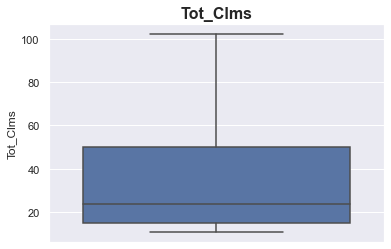

count    100000.000000
mean         87.005661
std         162.394197
min          11.000000
25%          21.000000
50%          38.000000
70%          68.000000
75%          83.000000
max        6061.000000
Name: Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'Tot_30day_Fills')

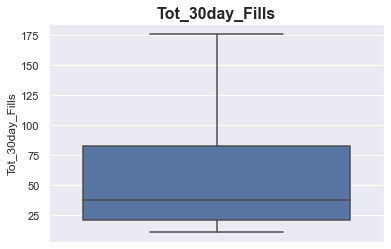

count    100000.00000
mean       2443.93010
std        4736.06118
min          11.00000
25%         480.00000
50%        1020.00000
70%        1895.00000
75%        2340.00000
max      166960.00000
Name: Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'Tot_Day_Suply')

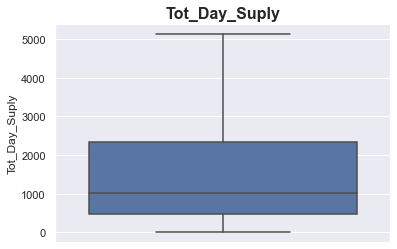

count    1.000000e+05
mean     5.389628e+03
std      3.781990e+04
min      0.000000e+00
25%      2.619950e+02
50%      6.752050e+02
70%      1.603113e+03
75%      2.145420e+03
max      3.746452e+06
Name: Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'Tot_Drug_Cst')

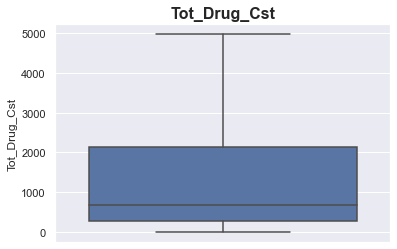

count    42273.000000
mean        29.906347
std         33.836446
min         11.000000
25%         14.000000
50%         20.000000
70%         29.000000
75%         33.000000
max       2444.000000
Name: Tot_Benes, dtype: float64


Text(0.5, 1.0, 'Tot_Benes')

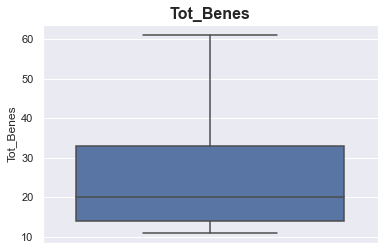

count    55060.000000
mean        50.033473
std         98.167968
min          0.000000
25%         13.000000
50%         22.000000
70%         38.000000
75%         47.000000
max       5090.000000
Name: GE65_Tot_Clms, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Clms')

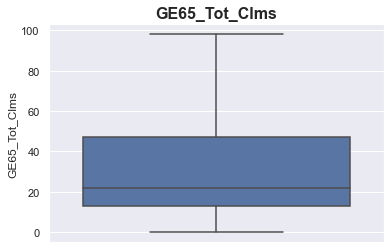

count    55060.000000
mean        88.402252
std        177.955728
min          0.000000
25%         18.000000
50%         36.000000
70%         65.000000
75%         80.000000
max       5525.800000
Name: GE65_Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_30day_Fills')

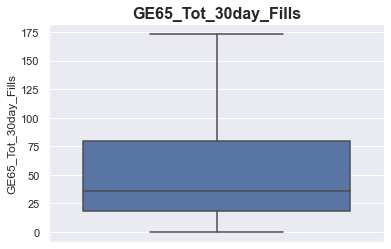

count    5.506000e+04
mean     4.792821e+03
std      3.043294e+04
min      0.000000e+00
25%      2.245850e+02
50%      6.275400e+02
70%      1.505854e+03
75%      2.029543e+03
max      3.126816e+06
Name: GE65_Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Drug_Cst')

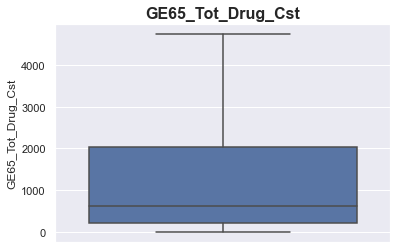

count     55060.000000
mean       2513.531493
std        5158.920073
min           0.000000
25%         422.750000
50%         990.000000
70%        1830.000000
75%        2270.000000
max      165640.000000
Name: GE65_Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Day_Suply')

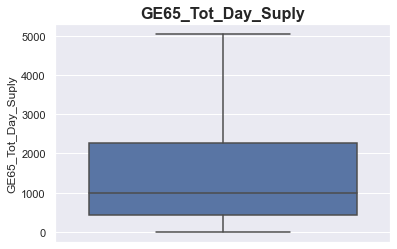

count    10155.000000
mean        32.676317
std         48.621539
min          0.000000
25%         13.000000
50%         19.000000
70%         29.000000
75%         33.000000
max       2356.000000
Name: GE65_Tot_Benes, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Benes')

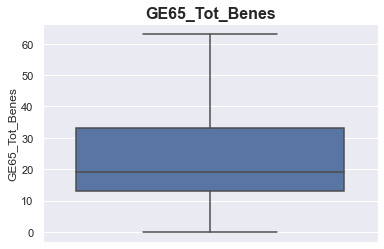

In [42]:
sns.set(style="darkgrid")
for vals in num_vals[:-1]:
    print(df_subset[vals].describe(percentiles=[.25,.50,.70,.75]))
    ax = sns.boxplot(y=df_subset[vals],showfliers=False) ## keeping showfliers=False just to see the meadian value and the data distibution 
    plt.title(vals, weight='bold', FontSize = 16)
    plt.show();
    

## Inferences

## 1.3 Checking the number of frauds present in the sample set 

In [43]:
df_subset['is_fraud'] = df_subset['is_fraud'].fillna(0)
df_subset['is_fraud'].value_counts()

0.0    99977
1.0       23
Name: is_fraud, dtype: int64

## 1.4 Inspecting each numerical column to understand more and treat accordingly.

### Tot_Clms  
- The number of Medicare Part D claims. This includes original prescriptions and refills. Aggregated records based on Tot_Clms fewer than 11 are not included in the data file.

In [71]:
df_subset.Tot_Clms.max()## max
df_subset.Tot_Clms.min()## min
df_subset.Tot_Clms.median()## median
len(df_subset[df_subset.Tot_Clms >= 500]) ## outlier check
len(df_subset[(df_subset['Tot_Clms'] >= 500  )& (df_subset['is_fraud'] == 1)]) # if it is fraud

5769.0

11.0

24.0

619

0

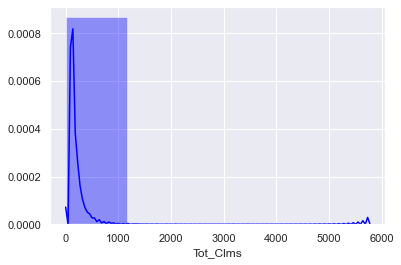

In [92]:
sns.distplot(df_subset['Tot_Clms'], color='blue',bins=5);

### Inferences
- The maximum number of claims from a single NPI is 5769
- the min of the claims is 11 as claims lessthan 11 has not been included in the data.
- There are almost 619 NPI's which have greater than 500 claims and in the sample data they havent been marked as Fraud.

## Tot_30day_Fills
- The aggregate number of Medicare Part D standardized 30-day fills. The standardized 30-day fill is derived from the number of days supplied on each Part D claim divided by 30. Standardized 30-day fill values less than 1.0 were bottom-coded with a value of 1.0 and standardized 30-day fill values greater than 12.0 were top-coded with a value of 12.0.

In [77]:
df_subset.Tot_30day_Fills.max()## max
df_subset.Tot_30day_Fills.min()## min
df_subset.Tot_30day_Fills.median()## median
len(df_subset[df_subset.Tot_30day_Fills >= 1000]) ## outlier check
len(df_subset[(df_subset['Tot_30day_Fills'] >= 1000  )& (df_subset['is_fraud'] == 1)]) # if it is fraud


6061.0

11.0

38.0

563

0

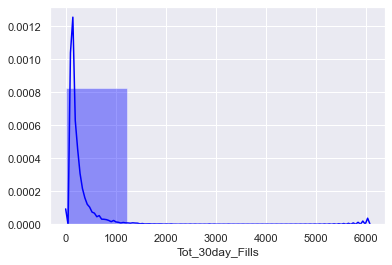

In [91]:
sns.distplot(df_subset['Tot_30day_Fills'], color='blue',bins=5);

## Inferences
- The outlier seems to have 0 fraud marked 

## Tot_Day_Suply
- The aggregate number of day’s supply for which this drug was dispensed.

In [80]:
df_subset.Tot_Day_Suply.max()## max
df_subset.Tot_Day_Suply.min()## min
df_subset.Tot_Day_Suply.median()## median
len(df_subset[df_subset.Tot_Day_Suply >= 25000]) ## outlier check
len(df_subset[(df_subset['Tot_Day_Suply'] >= 25000  )& (df_subset['is_fraud'] == 1)]) # if it is fraud

166960.0

11.0

1020.0

838

0

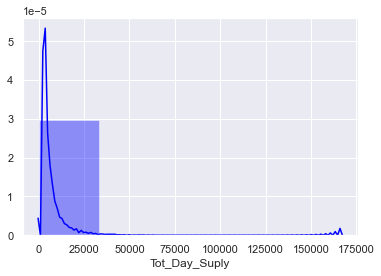

In [90]:
sns.distplot(df_subset['Tot_Day_Suply'], color='blue',bins=5);

### Inferences 
- The outlier doesnt seem to have fraud label

## Tot_Drug_Cst
- The aggregate drug cost paid for all associated claims. This amount includes ingredient cost, dispensing fee, sales tax, and any applicable vaccine administration fees and is based on the amounts paid by the Part D plan, Medicare beneficiary, government subsidies, and any other third-party payers.

In [93]:
df_subset.Tot_Drug_Cst.max()## max
df_subset.Tot_Drug_Cst.min()## min
df_subset.Tot_Drug_Cst.median()## median
len(df_subset[df_subset.Tot_Drug_Cst >= 1000000]) ## outlier check
len(df_subset[(df_subset['Tot_Drug_Cst'] >= 1000000  )& (df_subset['is_fraud'] == 1)]) # if it is fraud

3746452.26

0.0

675.2049999999999

21

0

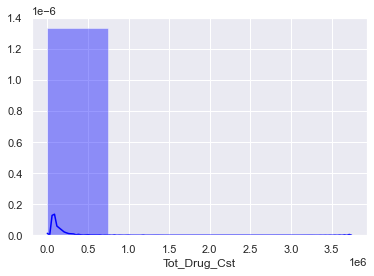

In [89]:
sns.distplot(df_subset['Tot_Drug_Cst'], color='blue',bins=5);

## Inferences 
- there are almost 21 claims which are greater than 1,000,000 but arent fraud
- All the distribution seems to be left skewed till now

## Tot_Benes
- The total number of unique Medicare Part D beneficiaries with at least one claim for the drug. Counts fewer than 11 are suppressed and are indicated by a blank.

In [99]:
df_subset.Tot_Benes.max()## max
df_subset.Tot_Benes.min()## min
df_subset.Tot_Benes.median()## median
len(df_subset[df_subset.Tot_Benes >= 500]) ## outlier check
len(df_subset[(df_subset['Tot_Benes'] >= 500  )& (df_subset['is_fraud'] == 1)]) # if it is fraud

2444.0

11.0

20.0

12

0

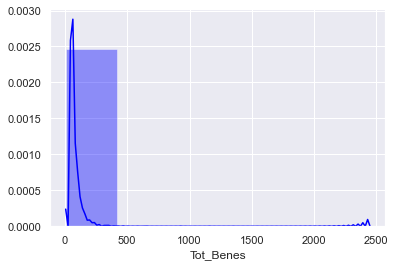

In [98]:
sns.distplot(df_subset['Tot_Benes'], color='blue',bins=6);

As the count below is suppressed and is kept blank lets take 5 as the mean of those and replace the nulls with 5

In [100]:
df_subset['Tot_Benes'].fillna(0,inplace=True)

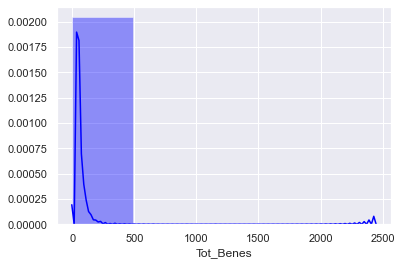

In [102]:
sns.distplot(df_subset['Tot_Benes'], color='blue',bins=5);

## Inferences 
- The plot seems to be left skewed 

In [104]:
df_subset.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
20851864,1821030065,Wang-Gor,Miranda,Pearland,TX,48,Family Practice,S,Losartan Potassium,Losartan Potassium,...,1913.19,64.0,NaN,169.0,472.0,1706.90,14145.0,counter_suppressed,NaN,0.0
13507577,1538111851,Wardell,Walter,Havelock,NC,37,Internal Medicine,S,Hydroxyzine Pamoate,Hydroxyzine Pamoate,...,350.14,0.0,NaN,16.0,18.0,250.43,530.0,primary_suppressed,NaN,0.0
24245712,1952391195,Perry,Ronald,Honolullu,HI,15,Internal Medicine,S,Sertraline Hcl,Sertraline Hcl,...,463.21,17.0,NaN,28.0,64.5,313.79,1912.0,counter_suppressed,NaN,0.0
19652130,1770559494,Appl,Bradley,Kansas City,KS,20,Family Practice,S,Bupropion Hcl Sr,Bupropion Hcl,...,1038.80,0.0,NaN,42.0,56.4,1038.80,1680.0,primary_suppressed,NaN,0.0
17043396,1669879540,Keeler,William,Lakeland,FL,12,Nurse Practitioner,S,Metoprolol Tartrate,Metoprolol Tartrate,...,182.16,0.0,counter_suppressed,NaN,NaN,NaN,NaN,primary_suppressed,NaN,0.0


A flag that indicates the reason the GE65_Tot_Clms, GE65_Tot_30day_Fills, GE65_Tot_Drug_Cst and GE65_Tot_Day_Suply variables are suppressed.hence we will proceed with imputing the value  5 for total benes and others with their median values.

In [125]:

df_subset['GE65_Tot_Clms'].fillna(df_subset['GE65_Tot_Clms'].median(),inplace=True)
df_subset['GE65_Tot_30day_Fills'].fillna(df_subset['GE65_Tot_30day_Fills'].median(),inplace=True)
df_subset['GE65_Tot_Drug_Cst'].fillna(df_subset['GE65_Tot_Drug_Cst'].median(),inplace=True)
df_subset['GE65_Tot_Day_Suply'].fillna(df_subset['GE65_Tot_Day_Suply'].median(),inplace=True)
df_subset['Tot_Benes'].fillna(5,inplace=True)
df_subset['GE65_Tot_Benes'].fillna(5,inplace=True)

In [114]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 20851864 to 1087725
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              10000

### Inferences 
- where  GE65_Sprsn_Flag  and GE65_Bene_Sprsn_Flag are not null they are not supressed hence can be replaced with not_suppressed

In [116]:
df_subset['GE65_Sprsn_Flag'].fillna('not_suppressed',inplace=True)
df_subset['GE65_Bene_Sprsn_Flag'].fillna('not_suppressed',inplace=True)

## Check the info again 

In [126]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 20851864 to 1087725
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              10000

In [124]:
#will replace the nulls GE65_Tot_Benes with 5 
df_subset['GE65_Tot_Benes'].mode()

0    11.0
dtype: float64

## 1.5 Univariate - categorical Variables

In [128]:
## copy the dataset and segrigate to see the spread by clubbing catagories with lessthan equalto 5% into group others 
df_cpy =df_subset.copy()

In [129]:
def Segrigate (Val,threshold =0.005):
    
    df_cpy[Val].value_counts(dropna=False,normalize=True)
    plt.figure(figsize=(5, 5))
    count_df= df_cpy[Val].value_counts(dropna=False,normalize=True)
    count_df=count_df.to_frame()
    count_df=count_df[count_df[Val]<threshold]
    to_replace= count_df.index
    to_replace
    df_cpy[Val] = df_cpy[Val].replace(to_replace, 'Others')
    df_cpy[Val] = df_cpy[Val].astype('object')
    df_cpy[Val].value_counts(dropna=False,normalize=True).plot(kind='bar',color='turquoise',legend=True,fontsize=11,grid=True);

In [130]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

In [131]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 20851864 to 1087725
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              10000

Family Practice                     26990
Internal Medicine                   24339
Nurse Practitioner                  15253
Physician Assistant                  6326
Cardiology                           3006
                                    ...  
Hospital                                1
Military Health Care Provider           1
Acupuncturist                           1
Marriage & Family Therapist             1
Undersea and Hyperbaric Medicine        1
Name: Prscrbr_Type, Length: 101, dtype: int64

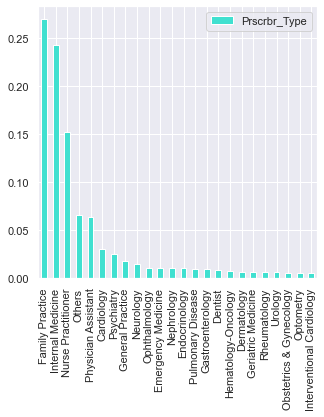

In [132]:
#for vals in cat_vals:
df_subset['Prscrbr_Type'].value_counts()
Segrigate('Prscrbr_Type')

## Inference 
- The maximum Prscrbr_Type are Family Practice.

## Prscrbr_Type_Src
- S = Medicare Specialty Code description
- T = Taxonomy Code Classification description

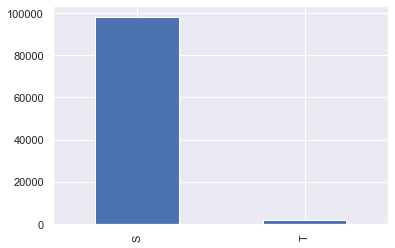

In [136]:
df_subset['Prscrbr_Type_Src'].value_counts().plot(kind='bar')

## Inference 
- max of the prscrbr are of type Medicare Specialty Code description 

In [152]:
df_subset['Brnd_Name'].value_counts()

Gabapentin                     1318
Atorvastatin Calcium           1259
Amlodipine Besylate            1197
Lisinopril                     1168
Furosemide                     1089
                               ... 
Trilyte With Flavor Packets       1
Apri                              1
Sulfacetamide Sodium              1
Alosetron Hcl                     1
Dasetta                           1
Name: Brnd_Name, Length: 1458, dtype: int64

In [150]:
df_subset['Gnrc_Name'].value_counts()

Metformin Hcl                     1434
Albuterol Sulfate                 1409
Levothyroxine Sodium              1395
Gabapentin                        1323
Atorvastatin Calcium              1263
                                  ... 
Ethosuximide                         1
Neomycin Sulf/Polymyxin B Sulf       1
Desvenlafaxine                       1
Fosinopril/Hydrochlorothiazide       1
Ethacrynic Acid                      1
Name: Gnrc_Name, Length: 1007, dtype: int64

## Inferences
- There is not much info from the generic name or brand name that we can get as of now.

In [157]:
df_subset['Prscrbr_State_FIPS'].value_counts() ## there are 112 types of FIPS used here (Federal Information Processing Standards)

6     8331
12    5789
36    5741
48    5412
42    4273
      ... 
69       3
78       2
9D       1
9B       1
9C       1
Name: Prscrbr_State_FIPS, Length: 112, dtype: int64

In [154]:

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 20851864 to 1087725
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              10000

In [138]:
df_subset.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
20851864,1821030065,Wang-Gor,Miranda,Pearland,TX,48,Family Practice,S,Losartan Potassium,Losartan Potassium,...,1913.19,64.0,not_suppressed,169.0,472.0,1706.90,14145.0,counter_suppressed,5.0,0.0
13507577,1538111851,Wardell,Walter,Havelock,NC,37,Internal Medicine,S,Hydroxyzine Pamoate,Hydroxyzine Pamoate,...,350.14,0.0,not_suppressed,16.0,18.0,250.43,530.0,primary_suppressed,5.0,0.0
24245712,1952391195,Perry,Ronald,Honolullu,HI,15,Internal Medicine,S,Sertraline Hcl,Sertraline Hcl,...,463.21,17.0,not_suppressed,28.0,64.5,313.79,1912.0,counter_suppressed,5.0,0.0
19652130,1770559494,Appl,Bradley,Kansas City,KS,20,Family Practice,S,Bupropion Hcl Sr,Bupropion Hcl,...,1038.80,0.0,not_suppressed,42.0,56.4,1038.80,1680.0,primary_suppressed,5.0,0.0
17043396,1669879540,Keeler,William,Lakeland,FL,12,Nurse Practitioner,S,Metoprolol Tartrate,Metoprolol Tartrate,...,182.16,0.0,counter_suppressed,22.0,36.0,627.54,990.0,primary_suppressed,5.0,0.0


In [139]:
num_vals

['Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Tot_Benes',
 'is_fraud']

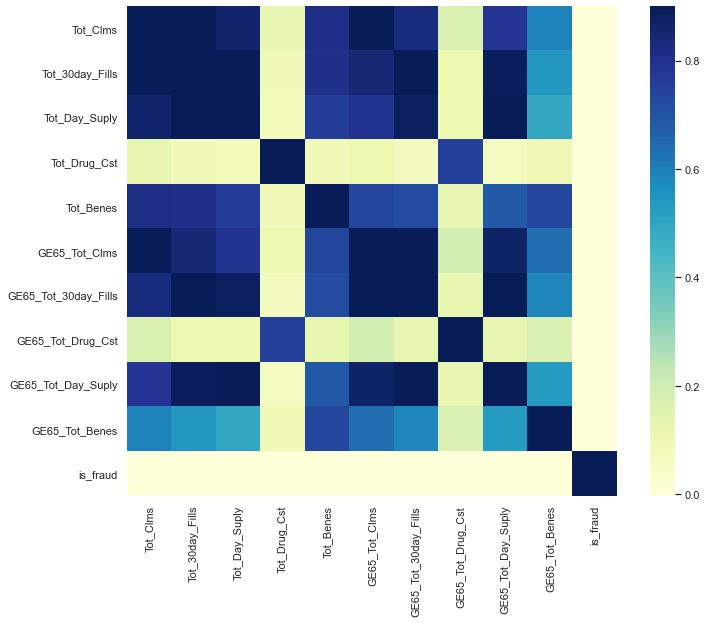

In [140]:
corrmat = df_subset[num_vals[:]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9,cmap="YlGnBu", square=True);

In [141]:
corrmat

,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes,is_fraud
Tot_Clms,1.000000,0.915226,0.864455,0.128969,0.813851,0.918616,0.832876,0.164976,0.784476,0.591175,-0.000901
Tot_30day_Fills,0.915226,1.000000,0.986300,0.082725,0.805953,0.845250,0.903148,0.113010,0.889430,0.541759,-0.001287
Tot_Day_Suply,0.864455,0.986300,1.000000,0.080864,0.760025,0.792234,0.885487,0.109525,0.897921,0.492625,-0.001474
Tot_Drug_Cst,0.128969,0.082725,0.080864,1.000000,0.089870,0.112898,0.072637,0.757352,0.070414,0.101622,-0.001237
Tot_Benes,0.813851,0.805953,0.760025,0.089870,1.000000,0.741027,0.725336,0.131165,0.687822,0.736131,0.000404
GE65_Tot_Clms,0.918616,0.845250,0.792234,0.112898,0.741027,1.000000,0.923284,0.188767,0.870559,0.635879,-0.001876
GE65_Tot_30day_Fills,0.832876,0.903148,0.885487,0.072637,0.725336,0.923284,1.000000,0.131047,0.985882,0.582895,-0.002323
GE65_Tot_Drug_Cst,0.164976,0.113010,0.109525,0.757352,0.131165,0.188767,0.131047,1.000000,0.127461,0.169115,-0.001388
GE65_Tot_Day_Suply,0.784476,0.889430,0.897921,0.070414,0.687822,0.870559,0.985882,0.127461,1.000000,0.531740,-0.002522
GE65_Tot_Benes,0.591175,0.541759,0.492625,0.101622,0.736131,0.635879,0.582895,0.169115,0.531740,1.000000,0.001212


## Inference 
- Tot_Clms seem to be highly correlated with most of the columns except GE65_Tot_Drug_Cs,GE65_Tot_Day_Suply etc .
- will  not impute anything for now and will go for few more exploration . 

In [184]:
# create box plot for Bivariate analysis
def plot_box_chart(attribute, vtitle,dataframe,palette="Set2"):
    
    fig = plt.figure(figsize=(12, 5))
    plt.rcParams['axes.titlesize'] = 14
    sns.boxplot(x=vtitle, y=attribute, data=dataframe, hue=vtitle, showfliers=False,palette=(palette))
    plt.xlabel(vtitle)
    plt.suptitle(attribute, weight='bold')
    plt.tight_layout(pad=3.0)
    

## Plot between Tot_Clms and is_fraud 

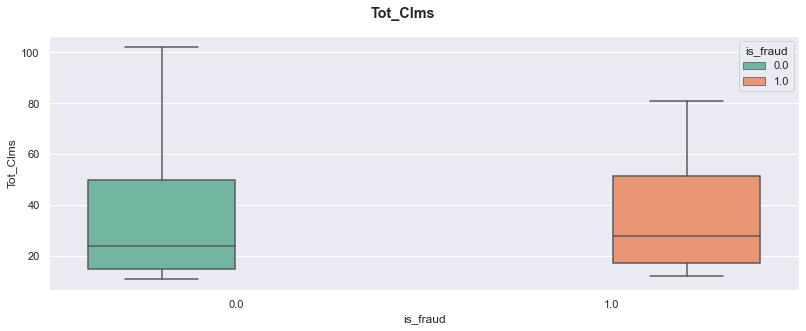

In [185]:
plot_box_chart('Tot_Clms','is_fraud',df_subset)

## Inferences
- for fraudulant records the median of total claims is between 25-30

## Plot between Tot_30day_Fills and is_fraud

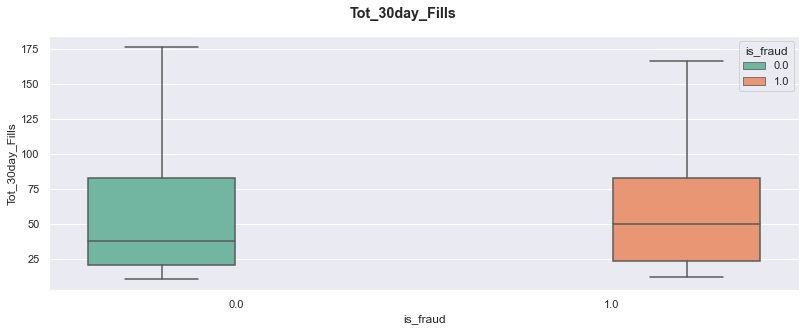

In [186]:
plot_box_chart('Tot_30day_Fills','is_fraud',df_subset)

## Inferences
- The median total 30day fills for fraudulant records is 50 whereas for non fraudulant transaction is about 40

## Plot between Tot_Day_Suply and is_fraud

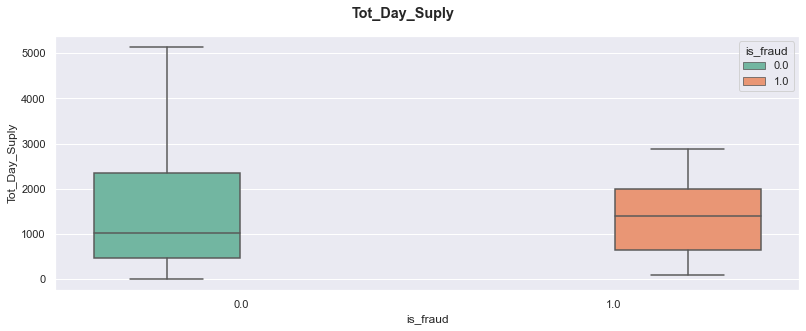

In [187]:
plot_box_chart('Tot_Day_Suply','is_fraud',df_subset)

## Inferences
- The median value of total day of supply in case of non fraudulant transactions is 1000 where as for fraudulant transactions is about 1500

## Plot between Tot_Drug_Cst and is_fraud

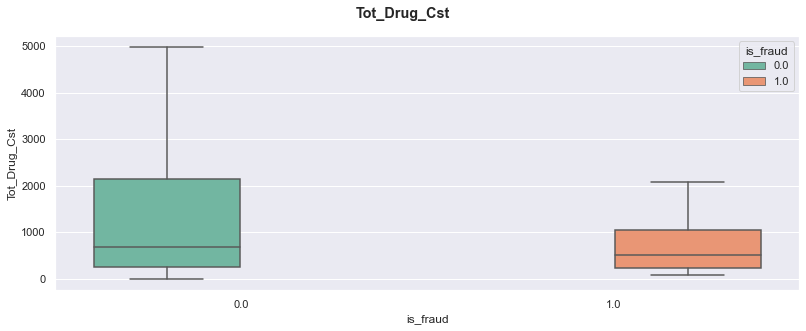

In [188]:
plot_box_chart('Tot_Drug_Cst','is_fraud',df_subset)

## Inferences 
- The median value of the drug cost is similar for both fraudulant and non fraudulant records

## Plot between Tot_Benes and is_fraud

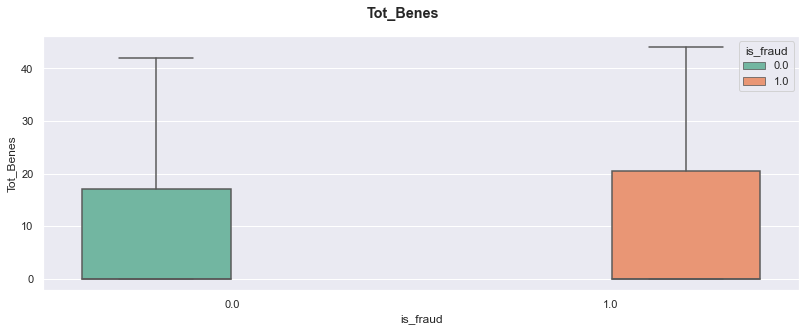

In [189]:
plot_box_chart('Tot_Benes','is_fraud',df_subset)

## Inferences
- There is no clear observations here 

## Plot between Tot_Clms , Tot_Drug_Cst

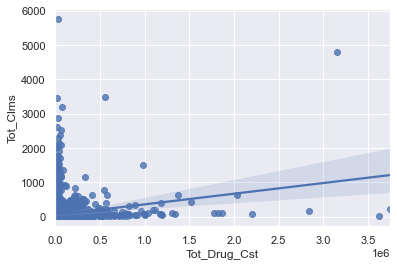

In [190]:
sns.regplot(data=df_subset, x='Tot_Drug_Cst',y='Tot_Clms');


### Inference
- Can't see much of relation between both  

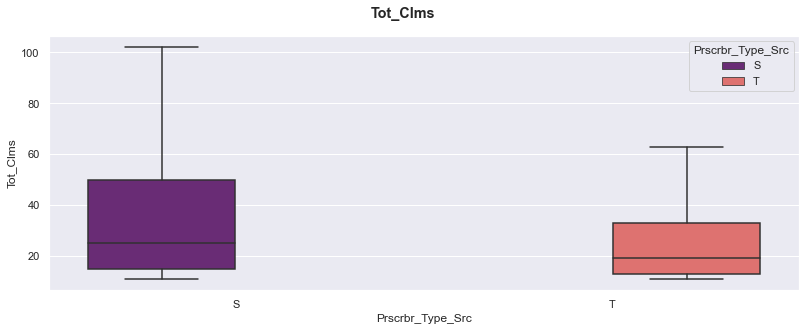

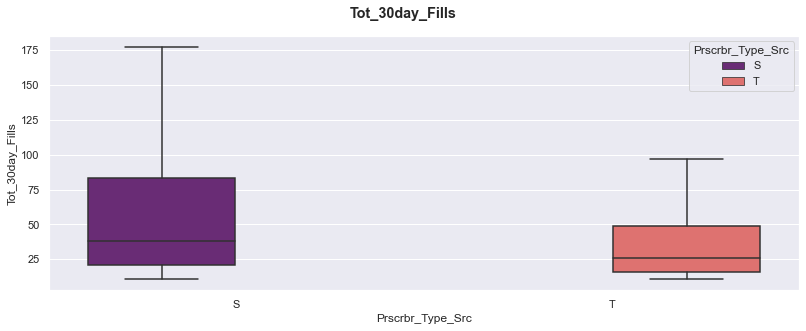

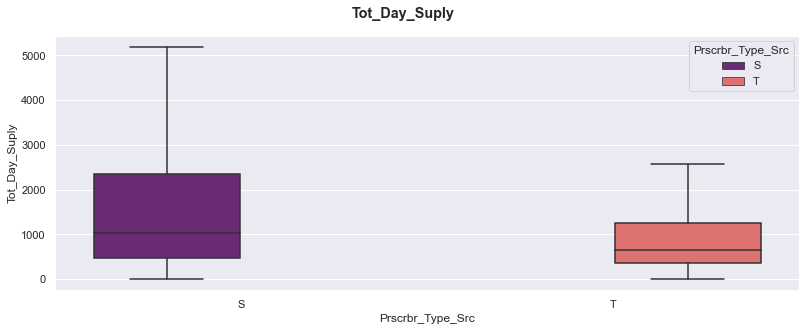

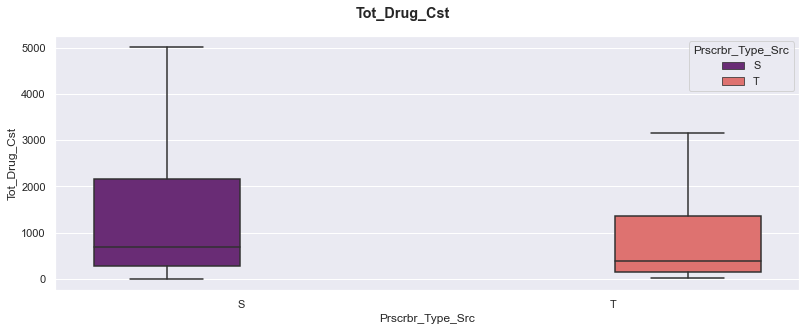

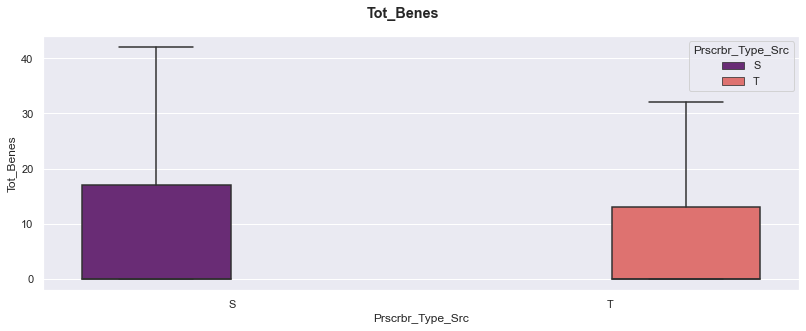

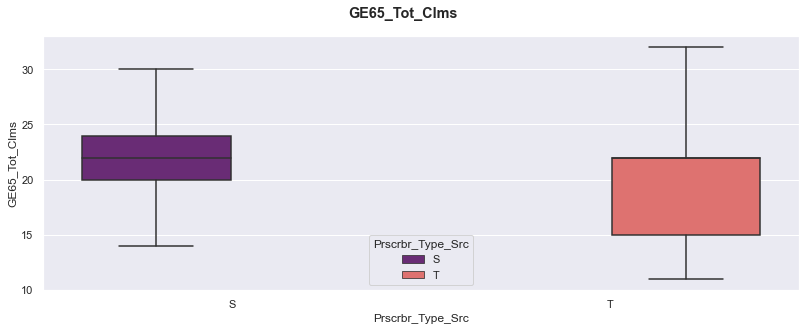

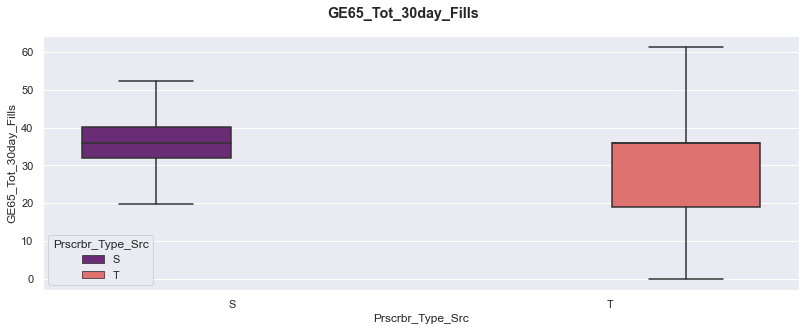

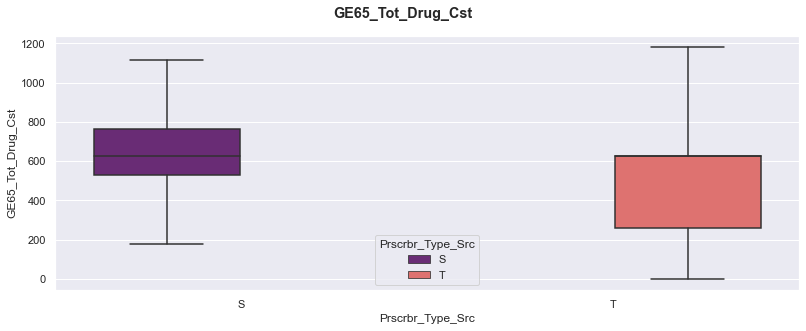

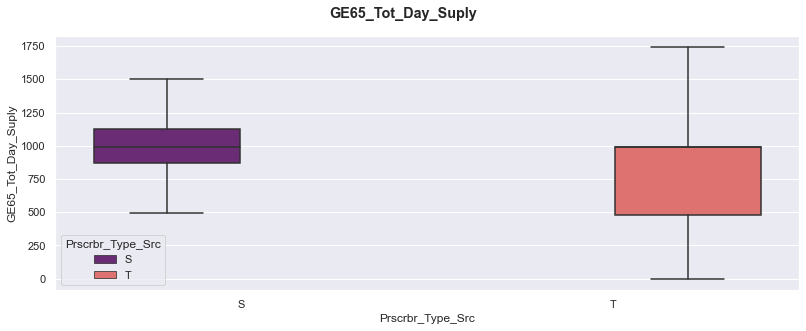

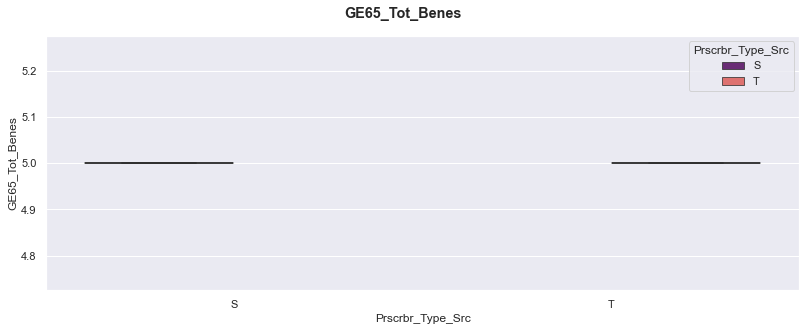

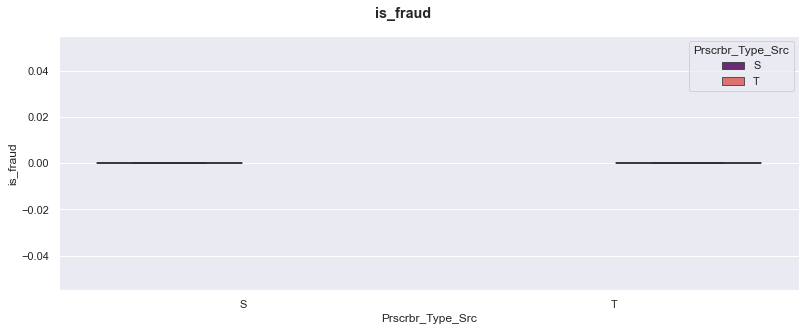

In [191]:
for vals in num_vals:
    plot_box_chart(vals,'Prscrbr_Type_Src',df_subset,'magma')

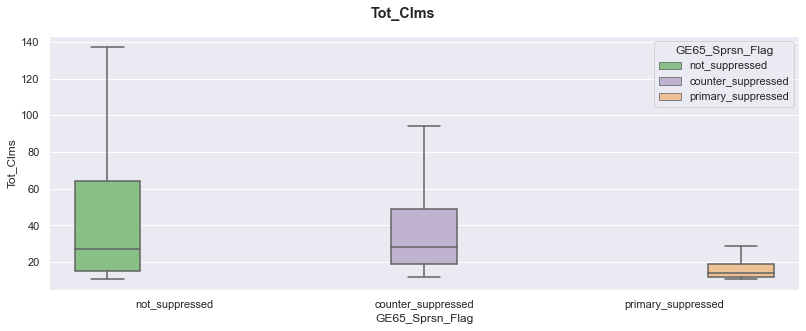

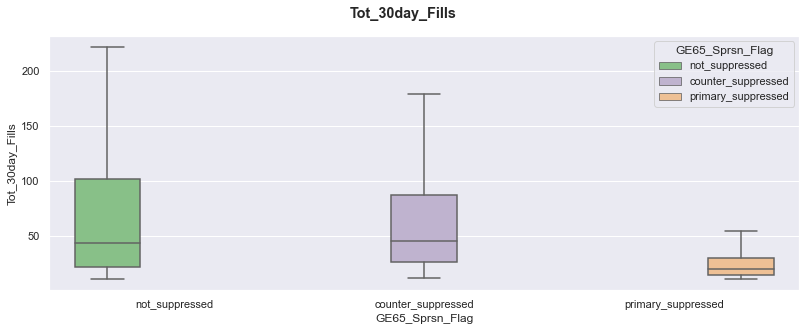

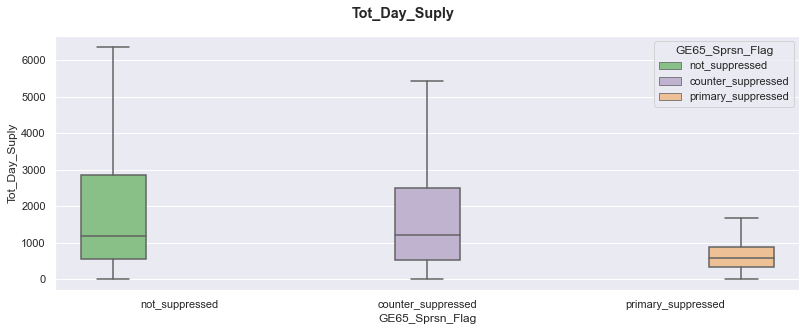

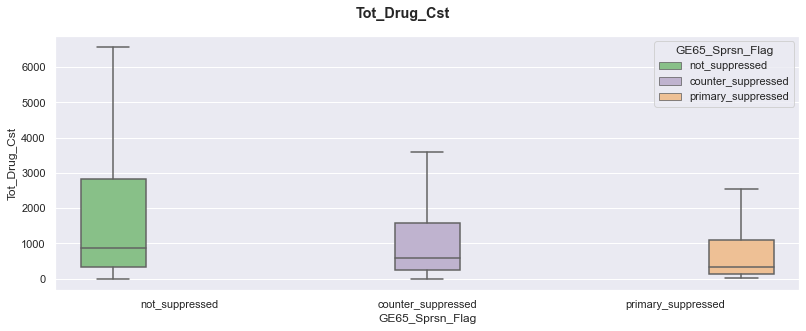

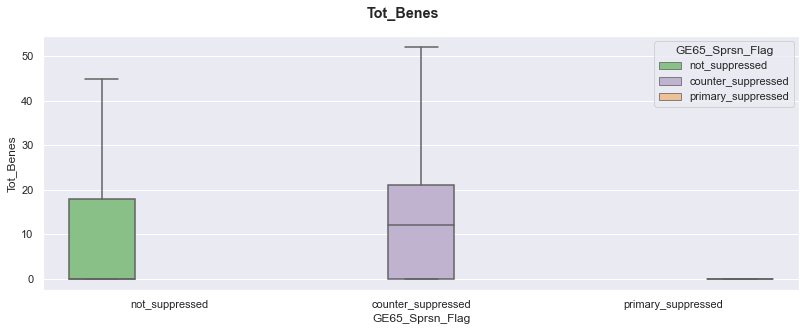

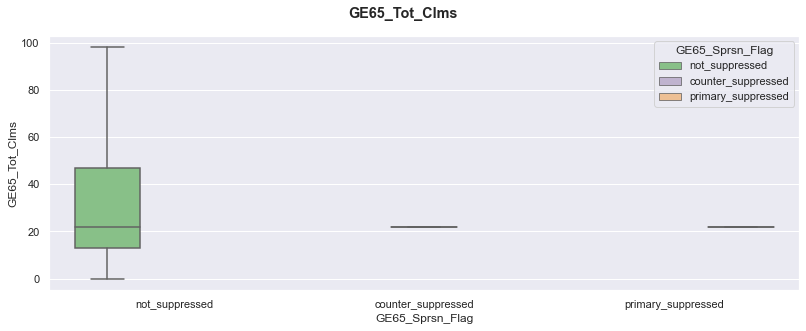

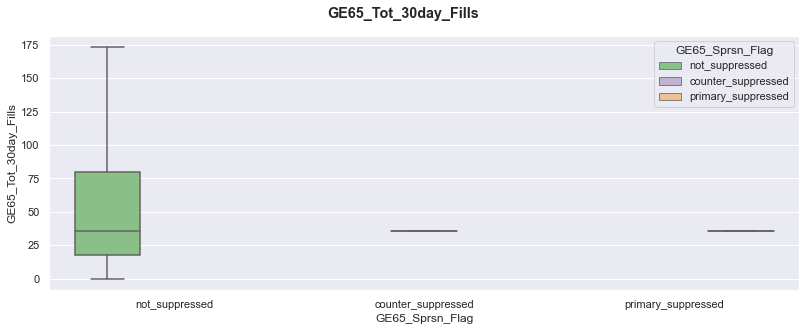

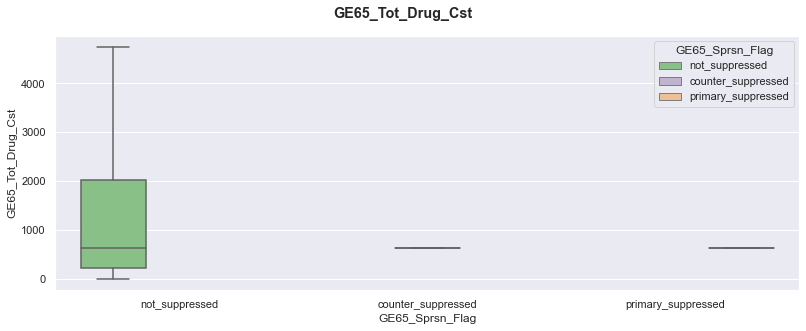

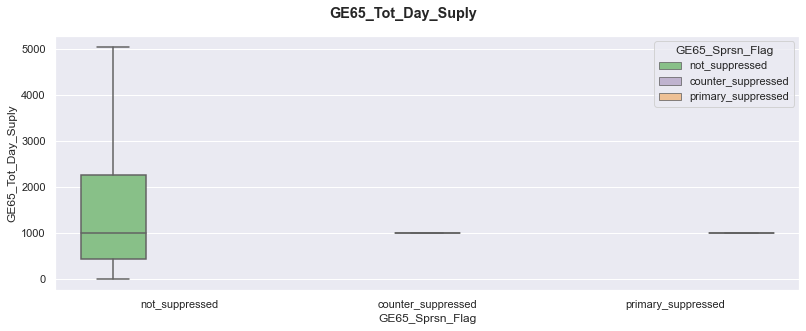

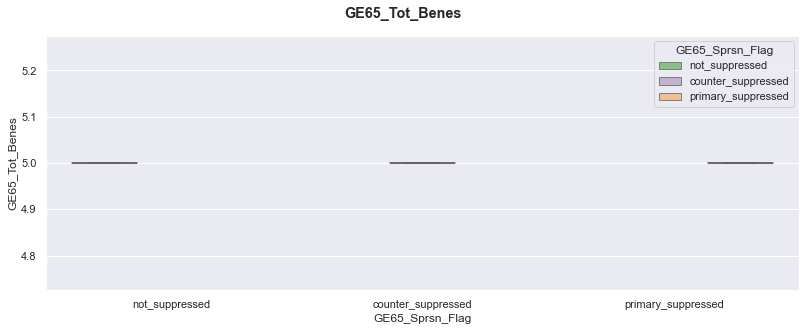

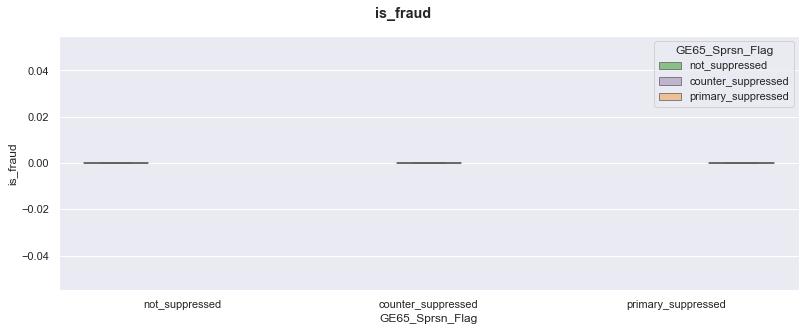

In [192]:
for vals in num_vals:
    plot_box_chart(vals,'GE65_Sprsn_Flag',df_subset,'Accent')

## Plot between Tot_Clms , Tot_30day_Fills

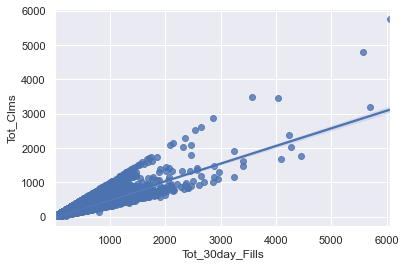

In [174]:
sns.regplot(data=df_subset, x='Tot_30day_Fills',y='Tot_Clms');

### Inference 
- With Increase in tot_30_fills tot_claims is increasing.

In [ ]:
### Dummy Variable creation

In [ ]:
## Scaling of Numerical values 

## Separate X and Y 

In [146]:
out_col = 'is_fraud'
X = df_subset.drop(out_col, axis=1)
X_Id = X.pop('Prscrbr_NPI')
y = df_subset['is_fraud']
X.shape, y.shape

((100000, 21), (100000,))

## Split Train test 

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 21), (30000, 21), (70000,), (30000,))

In [148]:
y_train.value_counts(normalize = True)

0.0    0.999743
1.0    0.000257
Name: is_fraud, dtype: float64

#### There exists a huge imbalance in the class 